In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Primary processing: check for null values

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.shape

(5110, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
print("perccentage of null value ",round((df['bmi'].isnull().sum()/df.shape[0])*100,2),"%")

perccentage of null value  3.93 %


We can drop it.

In [8]:
df= df.dropna()

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [10]:
df_valid = df.copy() # saved a copy of the dataset

processing : handling the categorical

In [11]:
from sklearn.preprocessing import LabelEncoder

def categorical_transform(list_colm):
    le = LabelEncoder()
    for colm in list_colm:
        df[colm] = le.fit_transform(df[colm])
    
    return df.head(10)

list_colm = ['gender','ever_married','work_type','Residence_type','smoking_status']

categorical_transform(list_colm)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,12109,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,12095,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [12]:
df_valid_num = df.copy() #transformed all categorical colm

Check your Data  is uniform ?

Vizualization plot : dist plot


In [13]:
df = df.drop(columns=['id'])

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

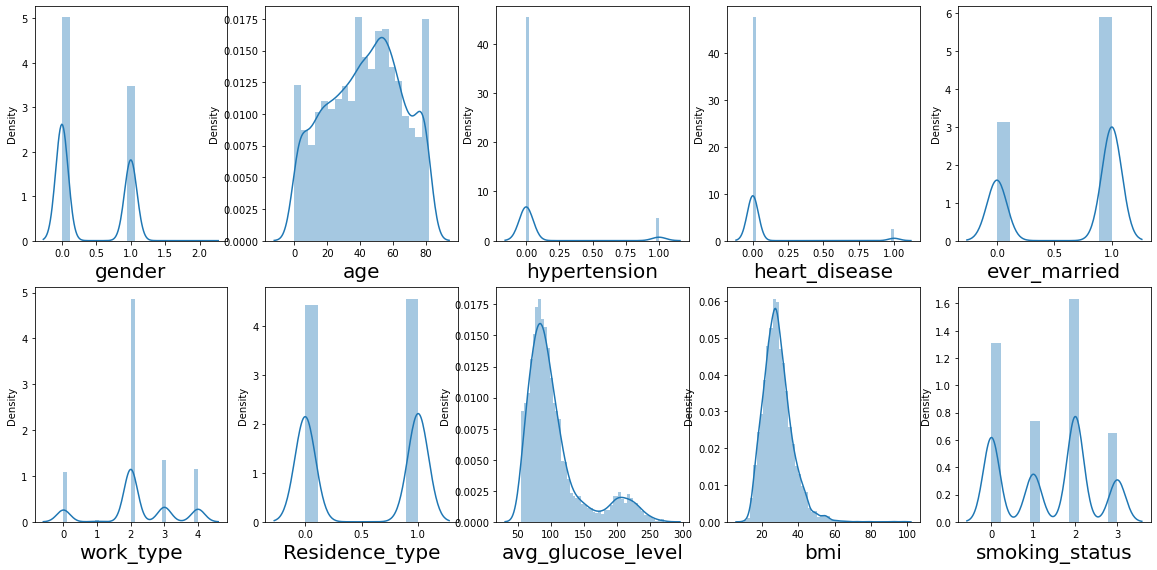

In [15]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1


for column in df:
    if plotnumber<11:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

Check for the outliers:

vizualization: box plot

<AxesSubplot:>

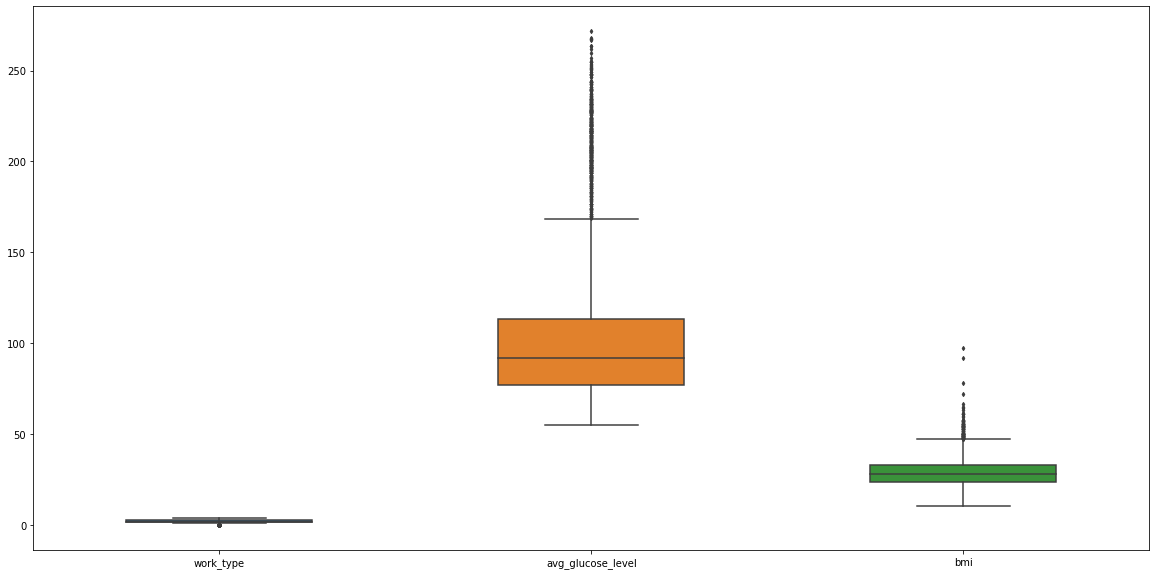

In [16]:
fig,ax = plt.subplots(figsize=(20,10))

sns.boxplot(data = df[['work_type','avg_glucose_level','bmi']], width = 0.5, ax = ax, fliersize = 3)

In [17]:
def remove_outlier(list_col):
    for col in list_col:
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        iqr = q3-q1
        col_threshold=q3+(iqr*1.5) #45,160
        df[col].values[df[col].values > col_threshold] = col_threshold
    return df

list_col = ['bmi','avg_glucose_level']
remove_outlier(list_col)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,168.32,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,168.32,34.4,3,1
4,0,79.0,1,0,1,3,0,168.32,24.0,2,1
5,1,81.0,0,0,1,2,1,168.32,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


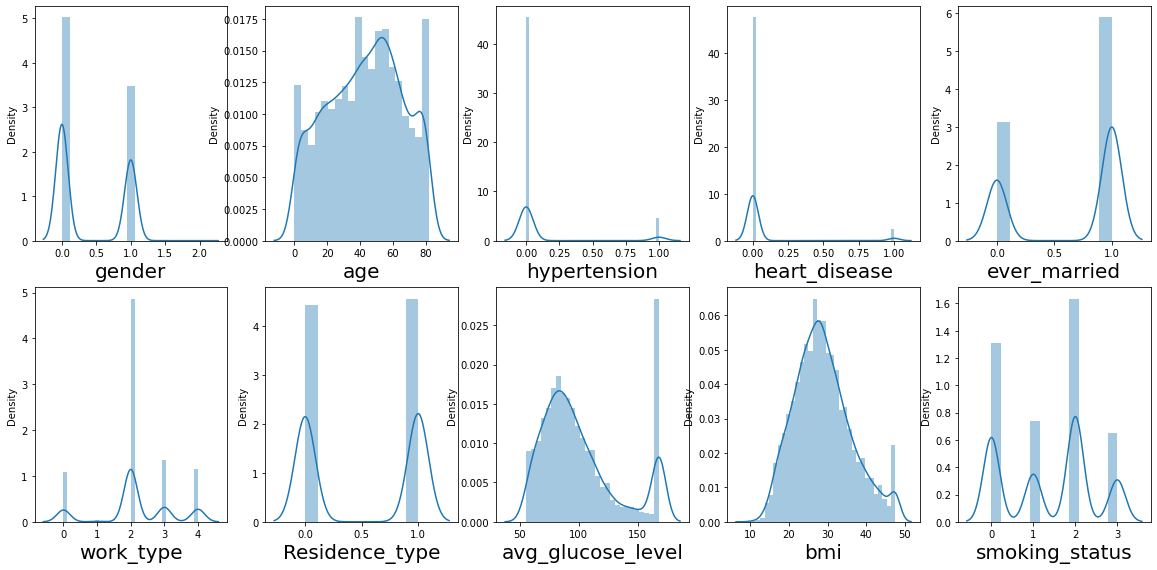

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1


for column in df:
    if plotnumber<11:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

<AxesSubplot:>

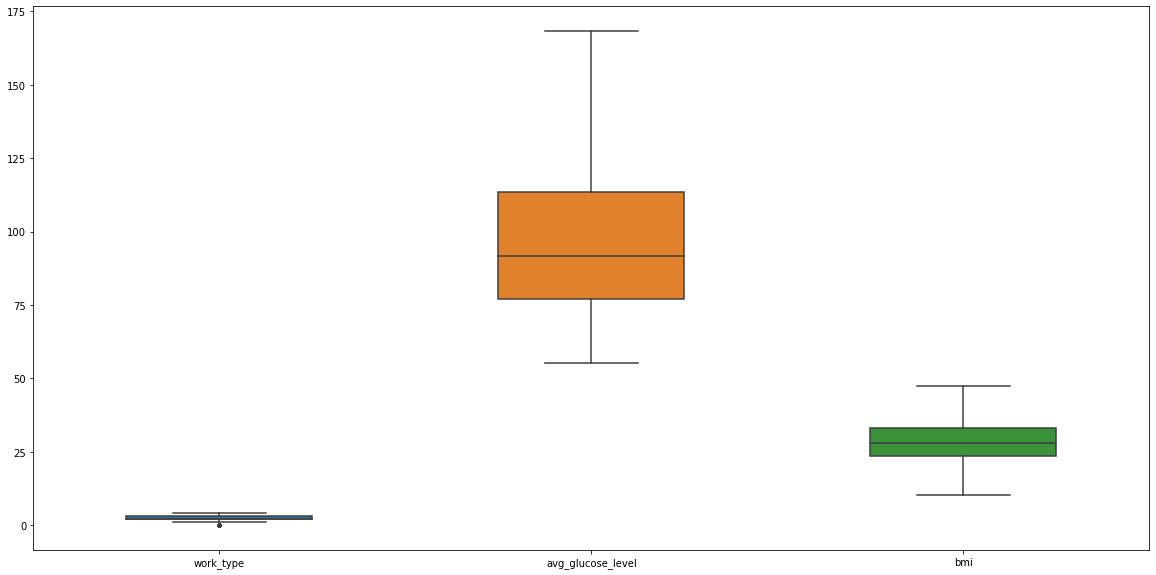

In [19]:
fig,ax = plt.subplots(figsize=(20,10))

sns.boxplot(data = df[['work_type','avg_glucose_level','bmi']], width = 0.5, ax = ax, fliersize = 3)

In [20]:
data_no_outlier = df.copy()

In [21]:
df.shape

(4909, 11)

Check how many columns are participating in label prediction.
1. Corr Matrix
2. VIF
3. PCA

In [22]:
X = data_no_outlier.drop(columns = ['stroke'])
y = data_no_outlier['stroke']

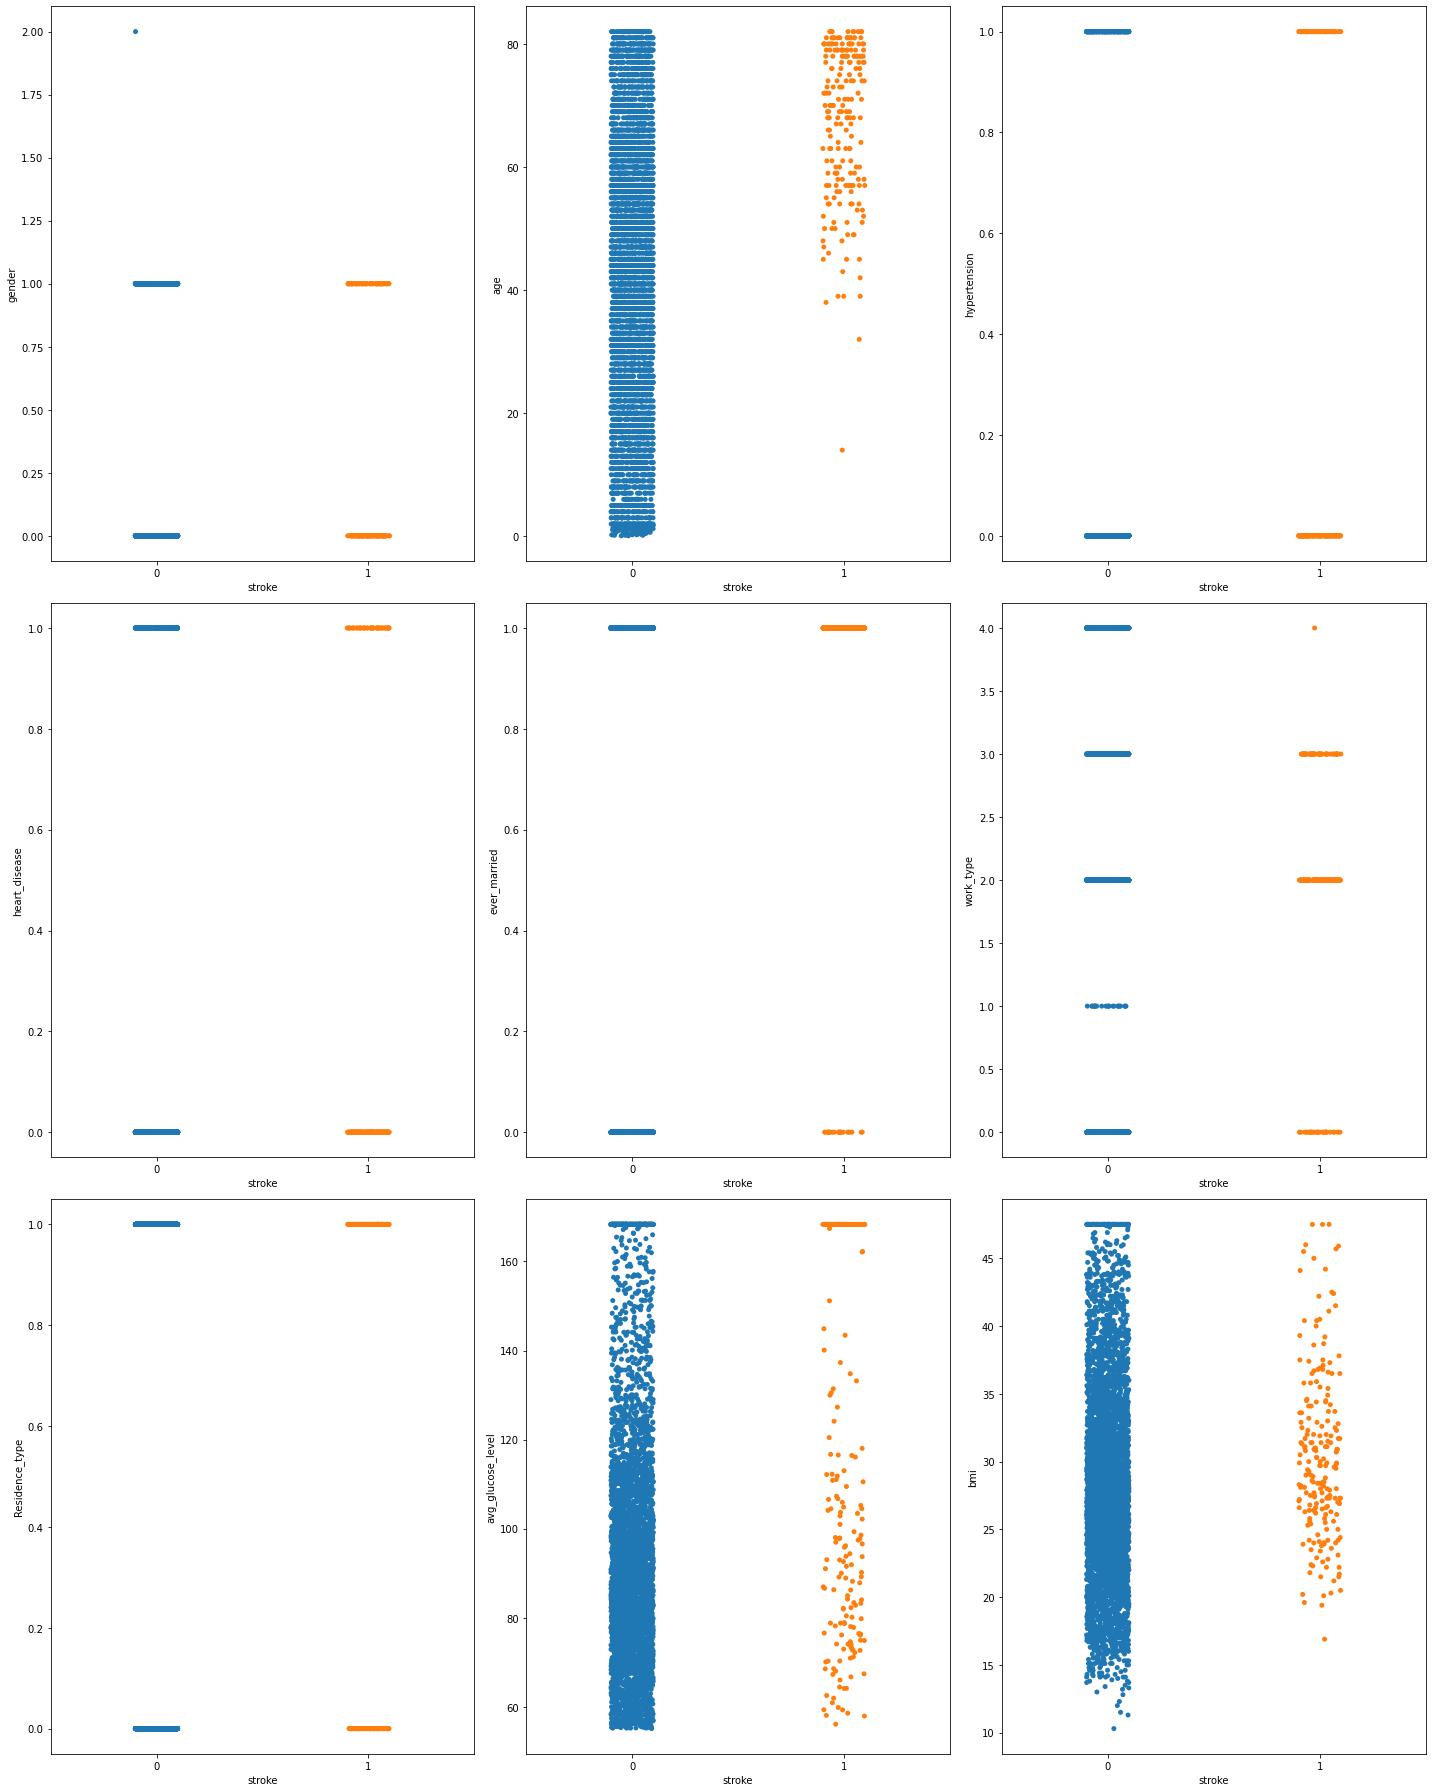

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [24]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [26]:
vif

,vif,Features
0,1.016987,gender
1,2.215897,age
2,1.110499,hypertension
3,1.101669,heart_disease
4,1.973666,ever_married
5,1.298293,work_type
6,1.000432,Residence_type
7,1.074680,avg_glucose_level
8,1.264840,bmi
9,1.168289,smoking_status


In [27]:

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.00,-0.03,0.02,0.08,-0.04,0.06,-0.01,0.05,-0.03,-0.06,0.01
age,-0.03,1.00,0.27,0.26,0.68,-0.37,0.01,0.20,0.36,0.28,0.23
hypertension,0.02,0.27,1.00,0.12,0.16,-0.05,-0.00,0.16,0.16,0.11,0.14
heart_disease,0.08,0.26,0.12,1.00,0.11,-0.03,-0.00,0.13,0.05,0.06,0.14
ever_married,-0.04,0.68,0.16,0.11,1.00,-0.36,0.00,0.13,0.36,0.26,0.11
work_type,0.06,-0.37,-0.05,-0.03,-0.36,1.00,-0.01,-0.04,-0.32,-0.31,-0.03
Residence_type,-0.01,0.01,-0.00,-0.00,0.00,-0.01,1.00,-0.01,0.00,0.01,0.01
avg_glucose_level,0.05,0.20,0.16,0.13,0.13,-0.04,-0.01,1.00,0.16,0.05,0.12
bmi,-0.03,0.36,0.16,0.05,0.36,-0.32,0.00,0.16,1.00,0.24,0.05
smoking_status,-0.06,0.28,0.11,0.06,0.26,-0.31,0.01,0.05,0.24,1.00,0.05


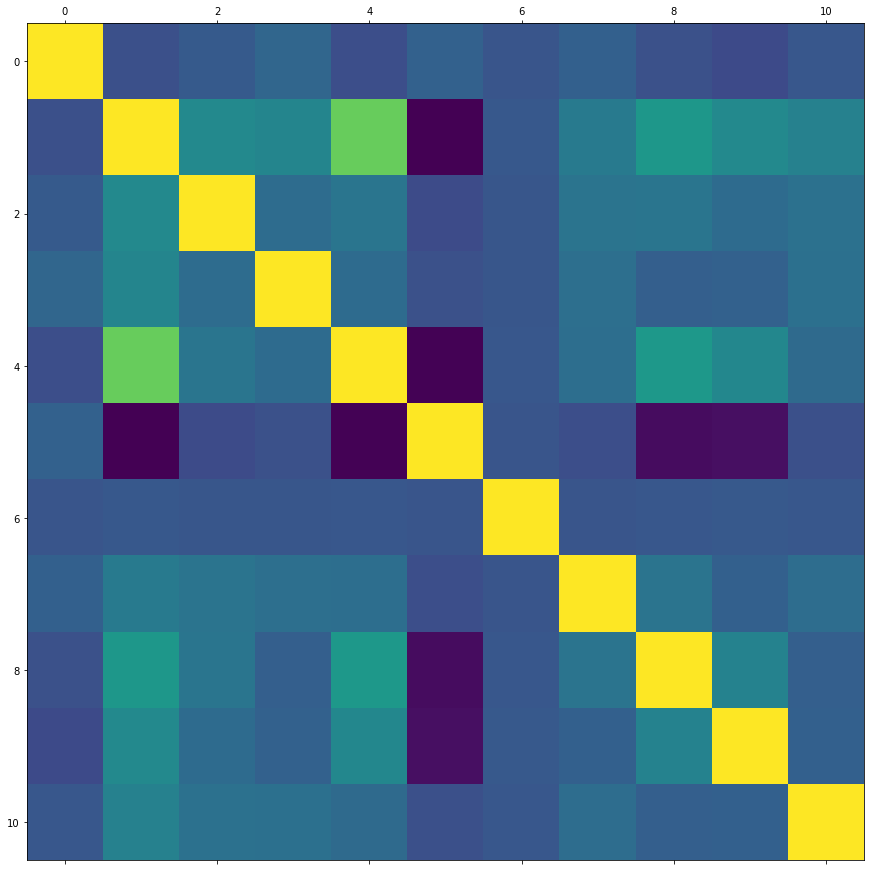

In [28]:
f = plt.figure(figsize=(15, 15))
corr = df.corr()
plt.matshow(corr,fignum=f.number)

In [31]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(X)
explainedVarianceRatio = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Explained Variance Ratio')

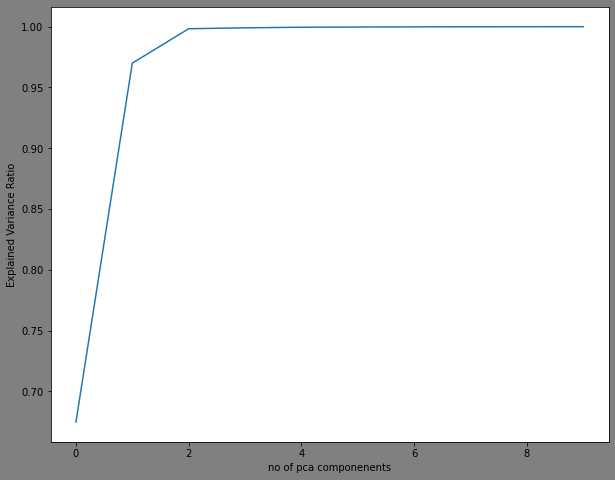

In [35]:
plt.figure(figsize=(10,8),facecolor='grey')
plt.plot(explainedVarianceRatio)
plt.xlabel('no of pca componenents')
plt.ylabel('Explained Variance Ratio')

In [36]:

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

#logistic regression as bench mark

from sklearn.linear_model import LogisticRegression


In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state=35)

In [38]:
logistic_reg = LogisticRegression()

In [39]:
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = logistic_reg.predict(x_test)

In [41]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9617263843648208

In [42]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1181,    0],
       [  47,    0]], dtype=int64)

In [44]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative)
Accuracy


0.9617263843648208

In [45]:
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [46]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9617263843648208

In [47]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9804898298048982

In [48]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

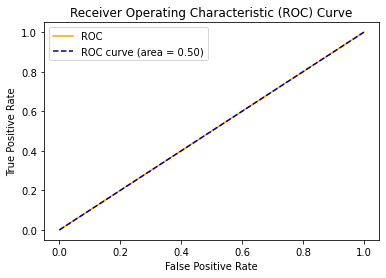

In [53]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [54]:
import pickle
# Writing different model files to file
with open( 'benchmark.sav', 'wb') as f:
    pickle.dump(logistic_reg,f)
    
with open('standardscalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
df_valid.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [61]:
df_valid=df_valid.drop(columns=['id'])

In [62]:
dtree = DecisionTreeClassifier(criterion='entropy',splitter='best')

In [65]:
X = df_valid['stroke']
y = df_valid.drop(columns=['stroke'])

In [68]:
x_train, y_train,x_test,y_test = train_test_split(X,y, test_size= 0.25, random_state=35)

In [69]:
dtree.fit(x_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.